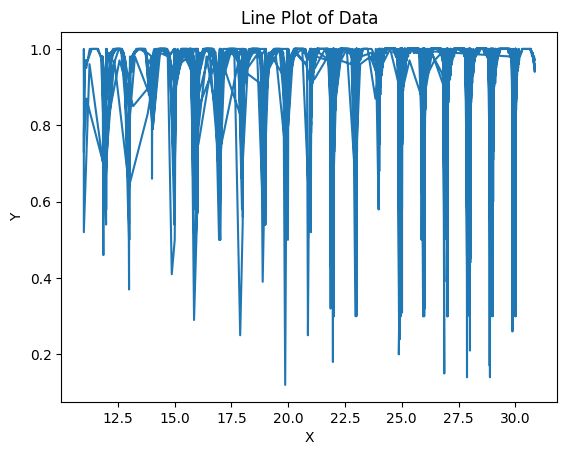

Epoch 1: Train Loss: 0.6208, Test Loss: 0.5761
Epoch 2: Train Loss: 0.5776, Test Loss: 0.5245
Epoch 3: Train Loss: 0.5259, Test Loss: 0.4650
Epoch 4: Train Loss: 0.4662, Test Loss: 0.3998
Epoch 5: Train Loss: 0.4008, Test Loss: 0.3335
Epoch 6: Train Loss: 0.3344, Test Loss: 0.2709
Epoch 7: Train Loss: 0.2717, Test Loss: 0.2166
Epoch 8: Train Loss: 0.2172, Test Loss: 0.1728
Epoch 9: Train Loss: 0.1733, Test Loss: 0.1391
Epoch 10: Train Loss: 0.1396, Test Loss: 0.1139
Epoch 11: Train Loss: 0.1142, Test Loss: 0.0949
Epoch 12: Train Loss: 0.0952, Test Loss: 0.0807
Epoch 13: Train Loss: 0.0808, Test Loss: 0.0697
Epoch 14: Train Loss: 0.0698, Test Loss: 0.0612
Epoch 15: Train Loss: 0.0613, Test Loss: 0.0545
Epoch 16: Train Loss: 0.0545, Test Loss: 0.0490
Epoch 17: Train Loss: 0.0490, Test Loss: 0.0446
Epoch 18: Train Loss: 0.0446, Test Loss: 0.0409
Epoch 19: Train Loss: 0.0409, Test Loss: 0.0379
Epoch 20: Train Loss: 0.0378, Test Loss: 0.0353
Epoch 21: Train Loss: 0.0352, Test Loss: 0.0331
E

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('postgres_data_15000_rv_mean.csv')

# Define the features and target
X = df['rv']
y = df['ae']

# Remove rows where y is greater than 1 or lower than 0
mask = (y > 1) | (y < 0)
X = X[~mask]
y = y[~mask]

# Remove all the decimals,except for two decimal places
X = np.round(X, 2)
y = np.round(y, 2)

X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot this data with matplotlib
# Use line plot
plt.plot(X, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Line Plot of Data')
plt.show()

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 10)  # input layer
        self.relu = nn.ReLU()  # activation function
        self.fc2 = nn.Linear(10, 1)  # output layer
        self.sigmoid = nn.Sigmoid()  # sigmoid activation function

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)  # apply sigmoid activation
        return x

net = Net()

criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

for epoch in range(200):
    optimizer.zero_grad()  # zero the gradients
    outputs = net(torch.Tensor(X_train))  # forward pass on training data
    loss = criterion(outputs, torch.Tensor(y_train))  # compute the loss
    loss.backward()  # backward pass
    optimizer.step()  # update the weights

    # Calculate loss and accuracy on training data
    train_loss = nn.MSELoss()(outputs, torch.Tensor(y_train))  # Use MSE loss

    # Calculate loss and accuracy on test data
    test_outputs = net(torch.Tensor(X_test))
    test_loss = criterion(test_outputs, torch.Tensor(y_test)).item()


    print(
        f"Epoch {epoch + 1}: Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

# Create and print new df with actual and predicted value for test set
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': test_outputs.detach().numpy().flatten().round(2)})
print(df)

# Calculate difference between actual and predicted values
df['Difference'] = (df['Actual'] - df['Predicted']).round(2)

# Save the dataframe to a CSV file
df.to_csv('predictions.csv', index=False)

# Calculate accuracy
count1 = (df['Difference'] == 0.00).sum()
count2 = (df['Difference'] == 0.01).sum()
count3 = (df['Difference'] == -0.01).sum()
count = count1 + count2 + count3
print("Correct predictions:", count)
print("Total predictions:", len(df))
print("Accuracy:", (count / len(df)).round(2) * 100, "%")



# NB The main issue with this model is that it doesn't catch the outliers, it seems to predict ae values between 0.7 and 1 only.

